# Load the Dataset

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [6]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Explore some rows & columns

In [7]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [8]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59316   -9999
59317   -9999
59318   -9999
59319   -9999
59320   -9999
Name:    TG, Length: 59321, dtype: int64

In [9]:
df[['   TG', '    DATE']]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


In [10]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Simple Statistics + Filtering

In [11]:
df['   TG'].mean()

np.float64(-991.1500649011311)

In [12]:
df.loc[df['   TG'] != -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [13]:
df.loc[df['   TG'] != -9999]['   TG']

0        21
1        46
2        31
3        37
4        31
         ..
53655    80
53656    70
53657    71
53658    63
53659    84
Name:    TG, Length: 53103, dtype: int64

In [15]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10

np.float64(6.360787526128467)

In [16]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

np.float64(26.2)

In [17]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10

np.float64(-28.8)

<Axes: >

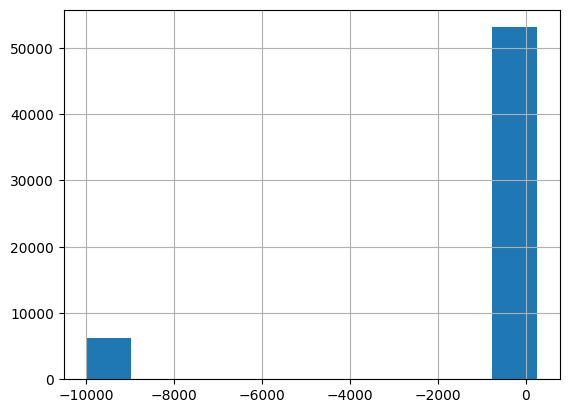

In [19]:
df['   TG'].hist()

<Axes: >

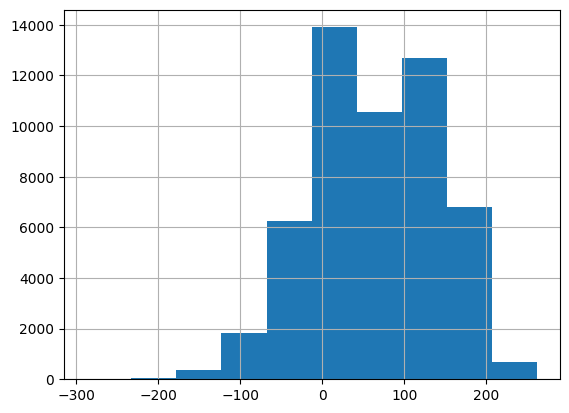

In [20]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Get certain cells

In [21]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [26]:
df.loc[df['    DATE'] == '1860-01-04']['   TG'] / 10

3    3.7
Name:    TG, dtype: float64

In [27]:
df.loc[df['    DATE'] == '1860-01-04']['   TG'].squeeze() / 10

np.float64(3.7)

In [32]:
df.loc[df['   TG'] == df['   TG'].max()]

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,0


In [33]:
df.loc[df['   TG'] == df['   TG'].max()]['   TG'].squeeze() / 10

np.float64(26.2)

In [34]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [36]:
df.loc[3, '   TG']

np.int64(37)

# Calculate a new column

In [49]:
import numpy as np

In [50]:
df['TG'] = df['   TG'].mask(df['   TG']==-9999, np.nan)

In [51]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Celcius,Fahrenheit
0,1,35381,1860-01-01,21,0,21.0,0.21,32.378
1,1,35381,1860-01-02,46,0,46.0,0.46,32.828
2,1,35381,1860-01-03,31,0,31.0,0.31,32.558
3,1,35381,1860-01-04,37,0,37.0,0.37,32.666
4,1,35381,1860-01-05,31,0,31.0,0.31,32.558
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


In [52]:
df['Celcius'] = df['TG'] / 10

In [53]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Celcius,Fahrenheit
0,1,35381,1860-01-01,21,0,21.0,2.1,32.378
1,1,35381,1860-01-02,46,0,46.0,4.6,32.828
2,1,35381,1860-01-03,31,0,31.0,3.1,32.558
3,1,35381,1860-01-04,37,0,37.0,3.7,32.666
4,1,35381,1860-01-05,31,0,31.0,3.1,32.558
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


In [54]:
df['Fahrenheit'] = df['Celcius'] * (9/5) + 32
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Celcius,Fahrenheit
0,1,35381,1860-01-01,21,0,21.0,2.1,35.78
1,1,35381,1860-01-02,46,0,46.0,4.6,40.28
2,1,35381,1860-01-03,31,0,31.0,3.1,37.58
3,1,35381,1860-01-04,37,0,37.0,3.7,38.66
4,1,35381,1860-01-05,31,0,31.0,3.1,37.58
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# Plotting

<Axes: >

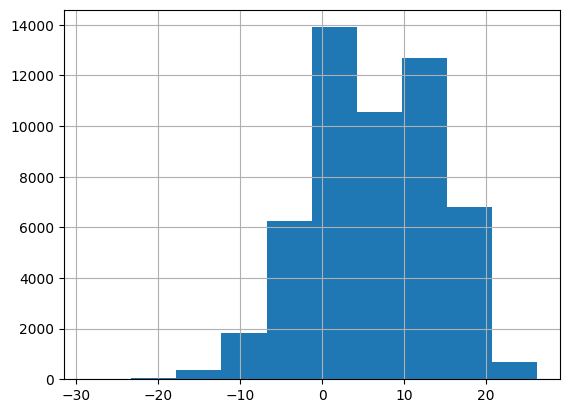

In [55]:
df['Celcius'].hist()

<Axes: xlabel='    DATE'>

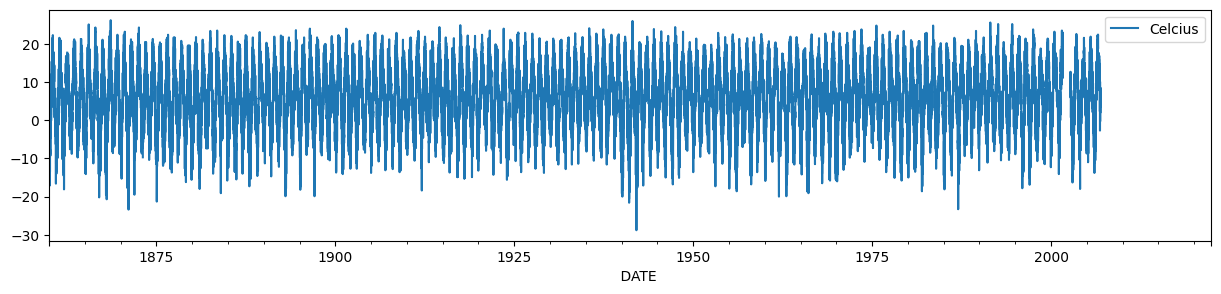

In [56]:
df.plot(x='    DATE', y='Celcius', figsize=(15,3))

<Axes: xlabel='    DATE'>

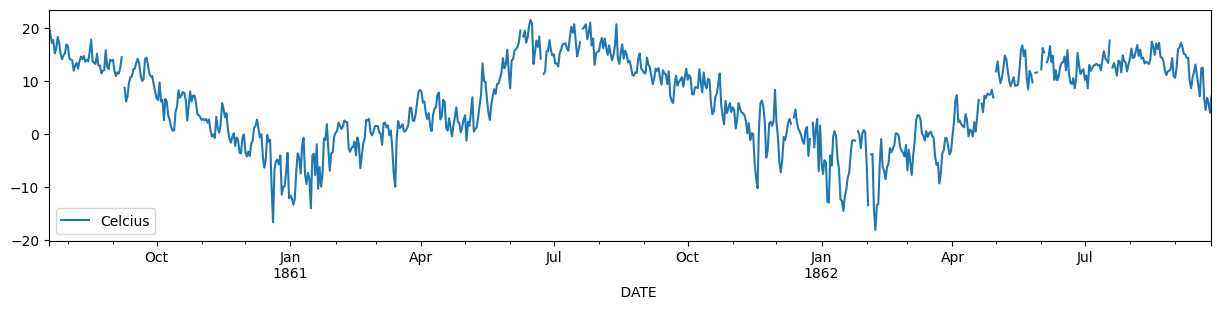

In [62]:
df[200:1000].plot(x='    DATE', y='Celcius', figsize=(15,3))